In [1]:
import pandas as pd 
df = pd.read_csv("..//static//csv//heart_2020_cleaned.csv")
print(df.columns)

display(df.head(10))

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   
5          Yes  28.87     Yes              No     No             6.0   
6           No  21.63      No              No     No            15.0   
7           No  31.64     Yes              No     No             5.0   
8           No  26.45      No              No     No             0.0   
9           No  40.69      No              No     No             0.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0          30.0          No  Female        55-59  White   
1           0.0          No  Female  80 or older  White   
2          30.0          No    Male        65-69  White   
3           0.0          No  Female        75-79  White   
4           0.0         Yes  Female        40-44  White   
5           0.0         Yes  Female        75-79  Black   
6           0.0          No  Female        70-74  White   
7           0.0         Yes  Female  80 or older  White   
8           0.0          No  Female  80 or older  White   
9           0.0         Yes    Male        65-69  White   

                  Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                      Yes              Yes  Very good        5.0    Yes   
1                       No              Yes  Very good        7.0     No   
2                      Yes              Yes       Fair        8.0    Yes   
3                       No               No       Good        6.0     No   
4                       No              Yes  Very good        8.0     No   
5                       No               No       Fair       12.0     No   
6                       No              Yes       Fair        4.0    Yes   
7                      Yes               No       Good        9.0    Yes   
8  No, borderline diabetes               No       Fair        5.0     No   
9                       No              Yes       Good       10.0     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         No  
5            No         No  
6            No        Yes  
7            No         No  
8           Yes         No  
9            No         No

Сегментация пациентов по рискам сердечно-сосудистых заболеваний
Цель: Определить группы пациентов с различными уровнями риска развития сердечно-сосудистых заболеваний на основе их демографических данных, образа жизни и состояния здоровья.

Пример:

Кластер 1: Пациенты с высоким риском (курение, высокий ИМТ, низкая физическая активность).

Кластер 2: Пациенты со средним риском (умеренное курение, средний ИМТ, средняя физическая активность).

Кластер 3: Пациенты с низким риском (отсутствие вредных привычек, нормальный ИМТ, высокая физическая активность).

Бизнес-применение:

Разработка персонализированных программ профилактики и лечения для каждой группы пациентов.

Таргетированная реклама медицинских услуг и продуктов для улучшения образа жизни.

In [11]:
import pandas as pd

## почистила данные чут чут
df = pd.read_csv("..//static//csv//heart_2020_cleaned.csv").head(1000)
global df_cleaned
df_cleaned = df.dropna()


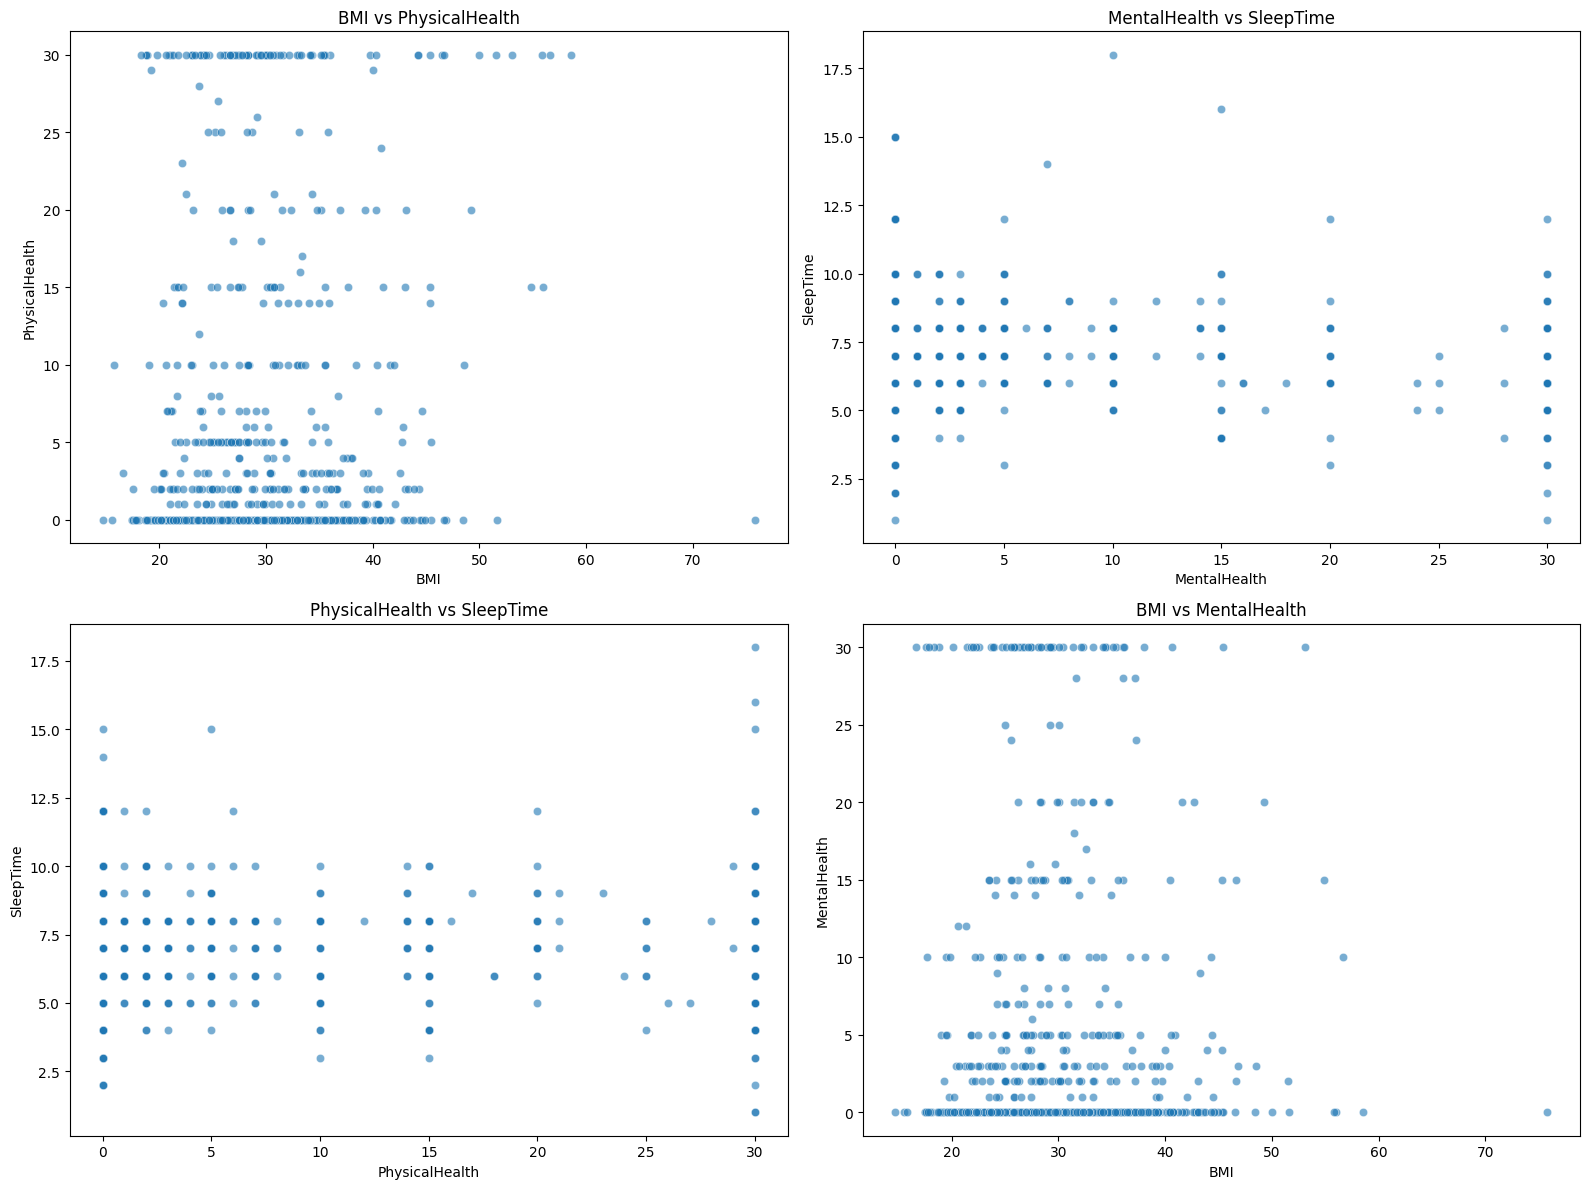

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_cleaned

# кодирование категориальных переменных
global df_encoded
df_encoded = pd.get_dummies(df, columns=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], drop_first=True)

# числовые признаки для визуализации
numeric_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(16, 12))

# сравнение зависимости BMI и PhysicalHealth
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_encoded['BMI'], y=df_encoded['PhysicalHealth'], alpha=0.6)
plt.title('BMI vs PhysicalHealth')

# сравнение зависимости MentalHealth и SleepTime
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_encoded['MentalHealth'], y=df_encoded['SleepTime'], alpha=0.6)
plt.title('MentalHealth vs SleepTime')

# сравнение зависимости PhysicalHealth и SleepTime
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_encoded['PhysicalHealth'], y=df_encoded['SleepTime'], alpha=0.6)
plt.title('PhysicalHealth vs SleepTime')

# сравнение зависимости BMI и MentalHealth
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_encoded['BMI'], y=df_encoded['MentalHealth'], alpha=0.6)
plt.title('BMI vs MentalHealth')

plt.tight_layout()
plt.show()

In [13]:
## стандартизация
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

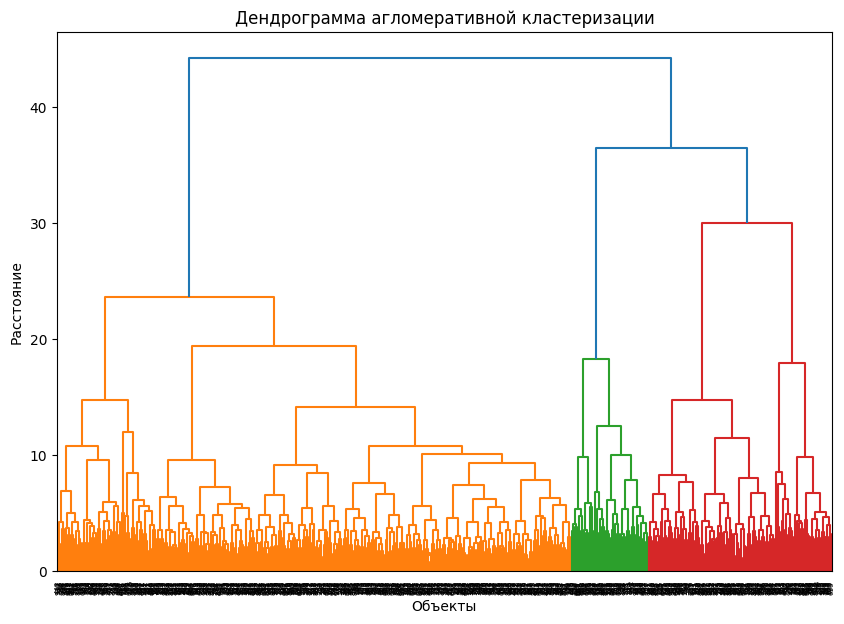

  HeartDisease       BMI  PhysicalHealth  MentalHealth  SleepTime  \
0           No -1.903749       -0.178909      3.477436  -1.363066   
1           No -1.334675       -0.509405     -0.432138  -0.147128   
2           No -0.385204        1.693903      3.477436   0.460840   
3           No -0.745820       -0.509405     -0.432138  -0.755097   
4           No -0.821900        2.575227     -0.432138   0.460840   

   Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
0         True                False       False            False     False   
1        False                False        True            False     False   
2         True                False       False            False      True   
3        False                False       False            False     False   
4        False                False       False             True     False   

   ...  Diabetic_Yes (during pregnancy)  PhysicalActivity_Yes  GenHealth_Fair  \
0  ...                            F

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

df = df_encoded

X = df.drop(columns=['HeartDisease'])

agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(X)

df_encoded['Cluster'] = clusters

Z = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

print(df_encoded.head())

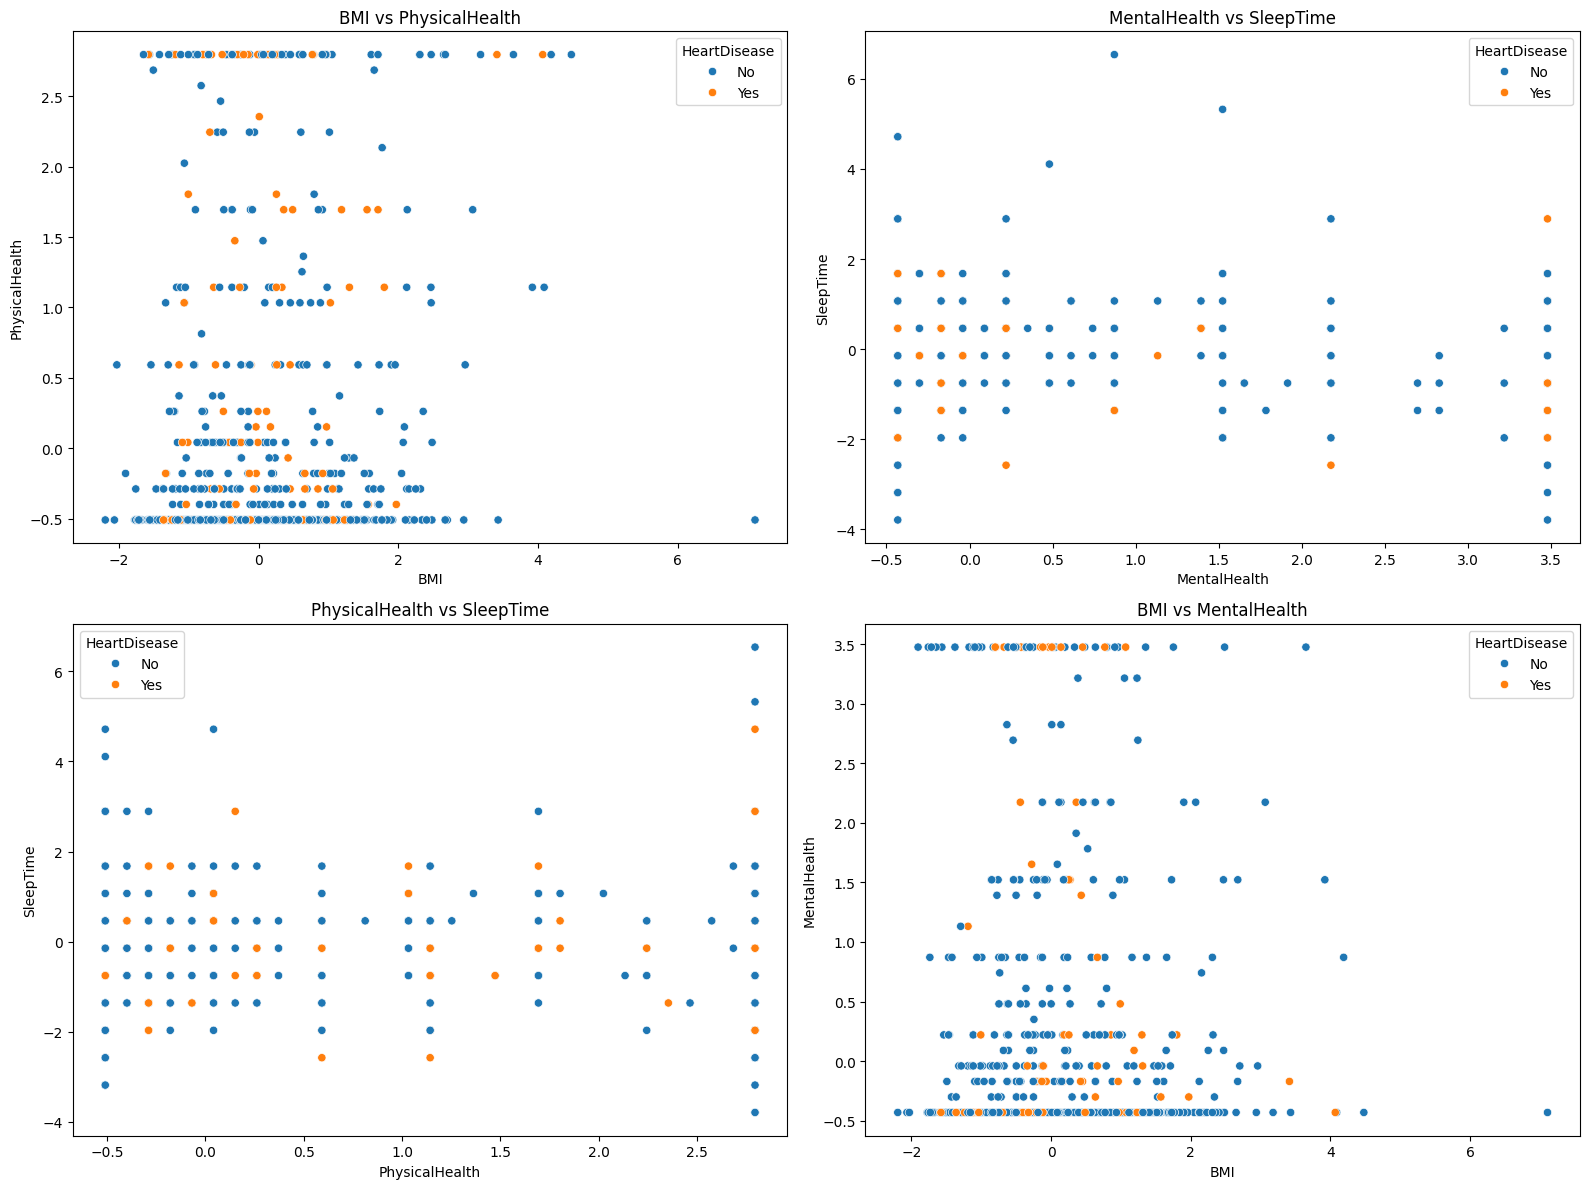

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация данных с учетом понимания их особенностей
plt.figure(figsize=(16, 12))

# Взаимодействие между BMI и PhysicalHealth
plt.subplot(2, 2, 1)
sns.scatterplot(x='BMI', y='PhysicalHealth', hue='HeartDisease', data=df)
plt.title('BMI vs PhysicalHealth')

# Взаимодействие между MentalHealth и SleepTime
plt.subplot(2, 2, 2)
sns.scatterplot(x='MentalHealth', y='SleepTime', hue='HeartDisease', data=df)
plt.title('MentalHealth vs SleepTime')

# Взаимодействие между PhysicalHealth и SleepTime
plt.subplot(2, 2, 3)
sns.scatterplot(x='PhysicalHealth', y='SleepTime', hue='HeartDisease', data=df)
plt.title('PhysicalHealth vs SleepTime')

# Сравнение зависимости BMI и MentalHealth
plt.subplot(2, 2, 4)
sns.scatterplot(x='BMI', y='MentalHealth', hue='HeartDisease', data=df)
plt.title('BMI vs MentalHealth')

plt.tight_layout()
plt.show()

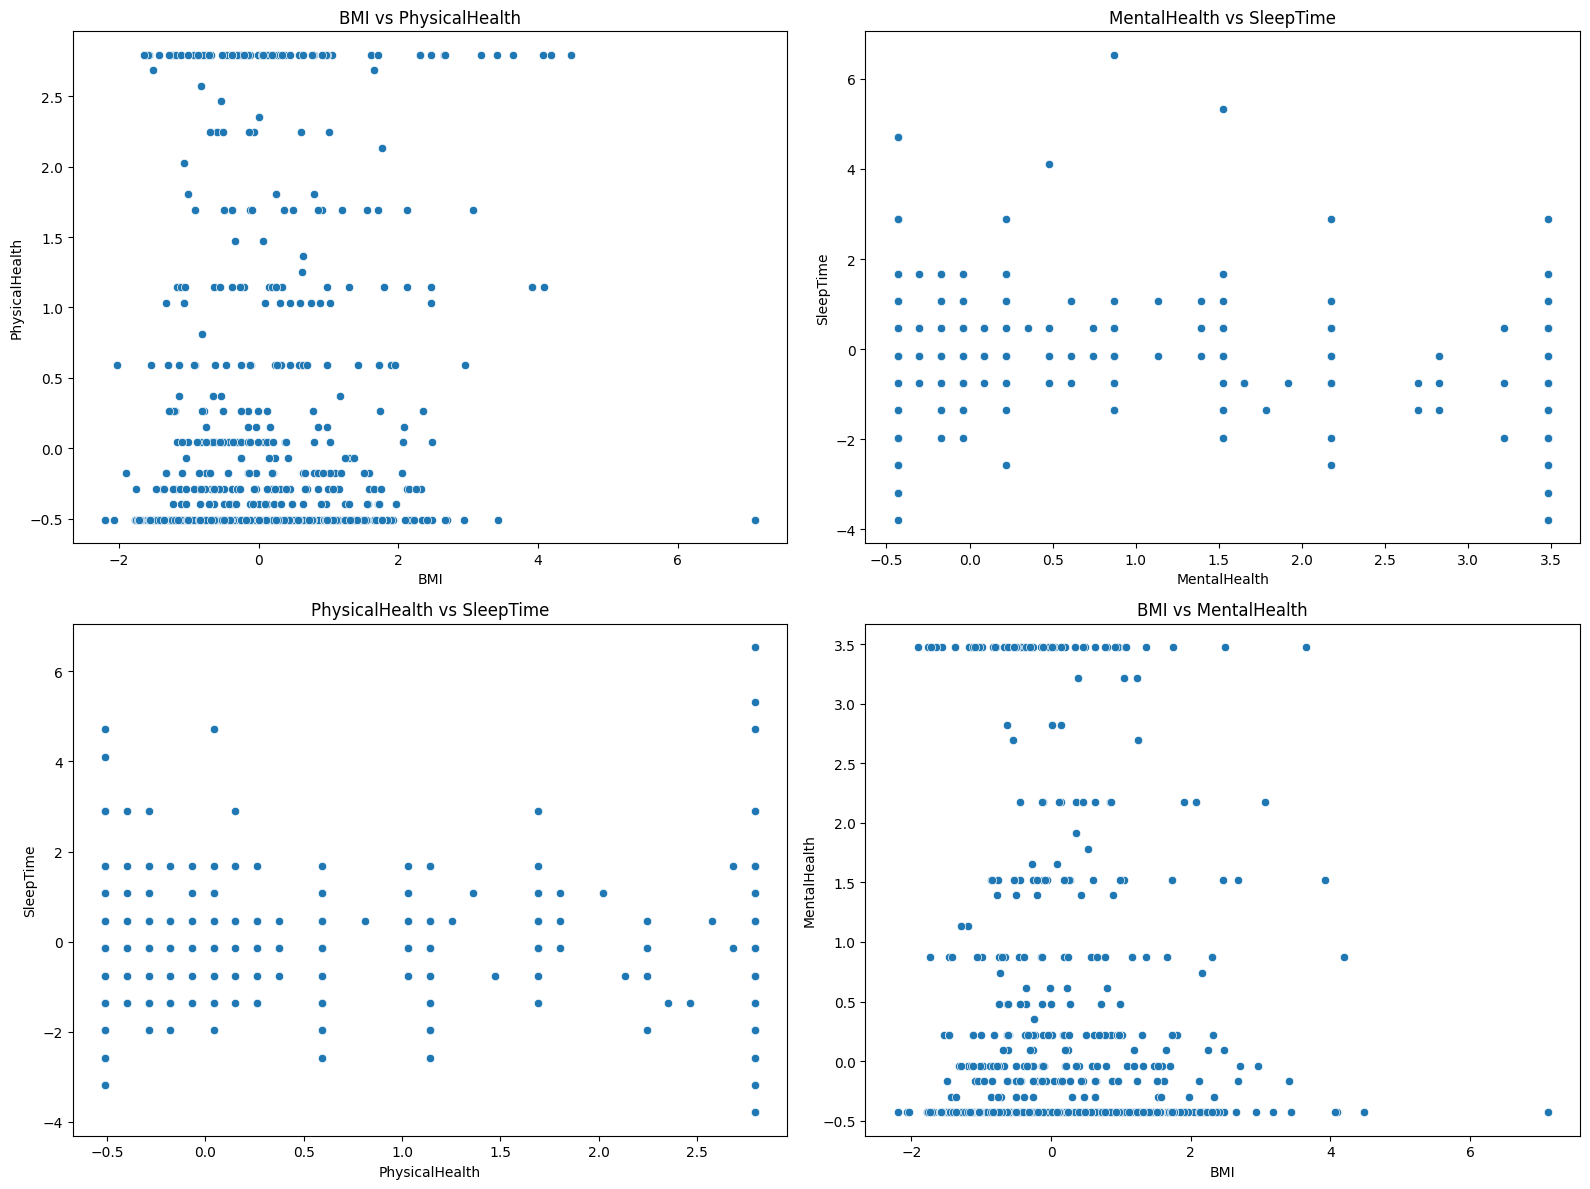

In [20]:
# Визуализация данных без учета понимания их особенностей
plt.figure(figsize=(16, 12))

# Взаимодействие между BMI и PhysicalHealth
plt.subplot(2, 2, 1)
sns.scatterplot(x='BMI', y='PhysicalHealth', data=df)
plt.title('BMI vs PhysicalHealth')

# Взаимодействие между MentalHealth и SleepTime
plt.subplot(2, 2, 2)
sns.scatterplot(x='MentalHealth', y='SleepTime', data=df)
plt.title('MentalHealth vs SleepTime')

# Взаимодействие между PhysicalHealth и SleepTime
plt.subplot(2, 2, 3)
sns.scatterplot(x='PhysicalHealth', y='SleepTime', data=df)
plt.title('PhysicalHealth vs SleepTime')

# Сравнение зависимости BMI и MentalHealth
plt.subplot(2, 2, 4)
sns.scatterplot(x='BMI', y='MentalHealth', data=df)
plt.title('BMI vs MentalHealth')

plt.tight_layout()
plt.show()

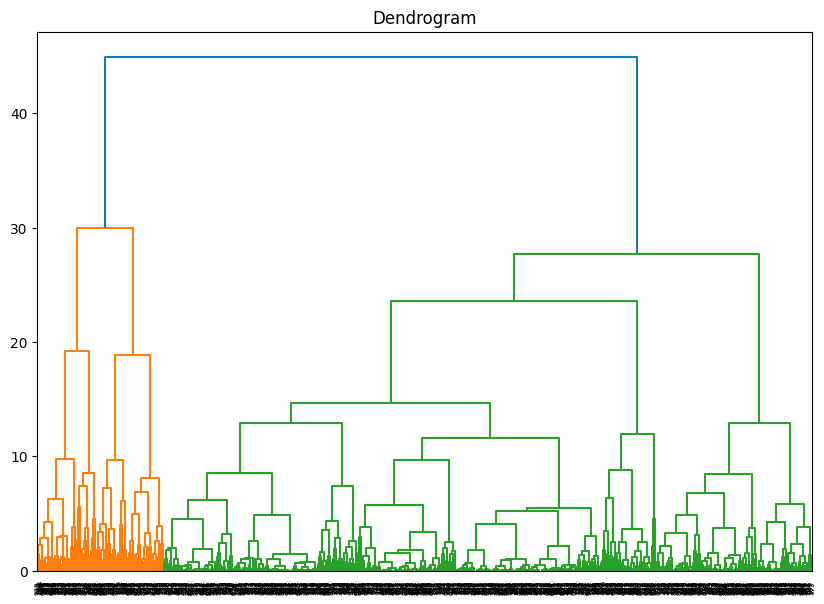

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Выбор признаков для кластеризации
X = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

# Применение агломеративной кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(X)

# Добавление результатов кластеризации в датасет
df['Cluster'] = clusters

# Визуализация дендрограммы
linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

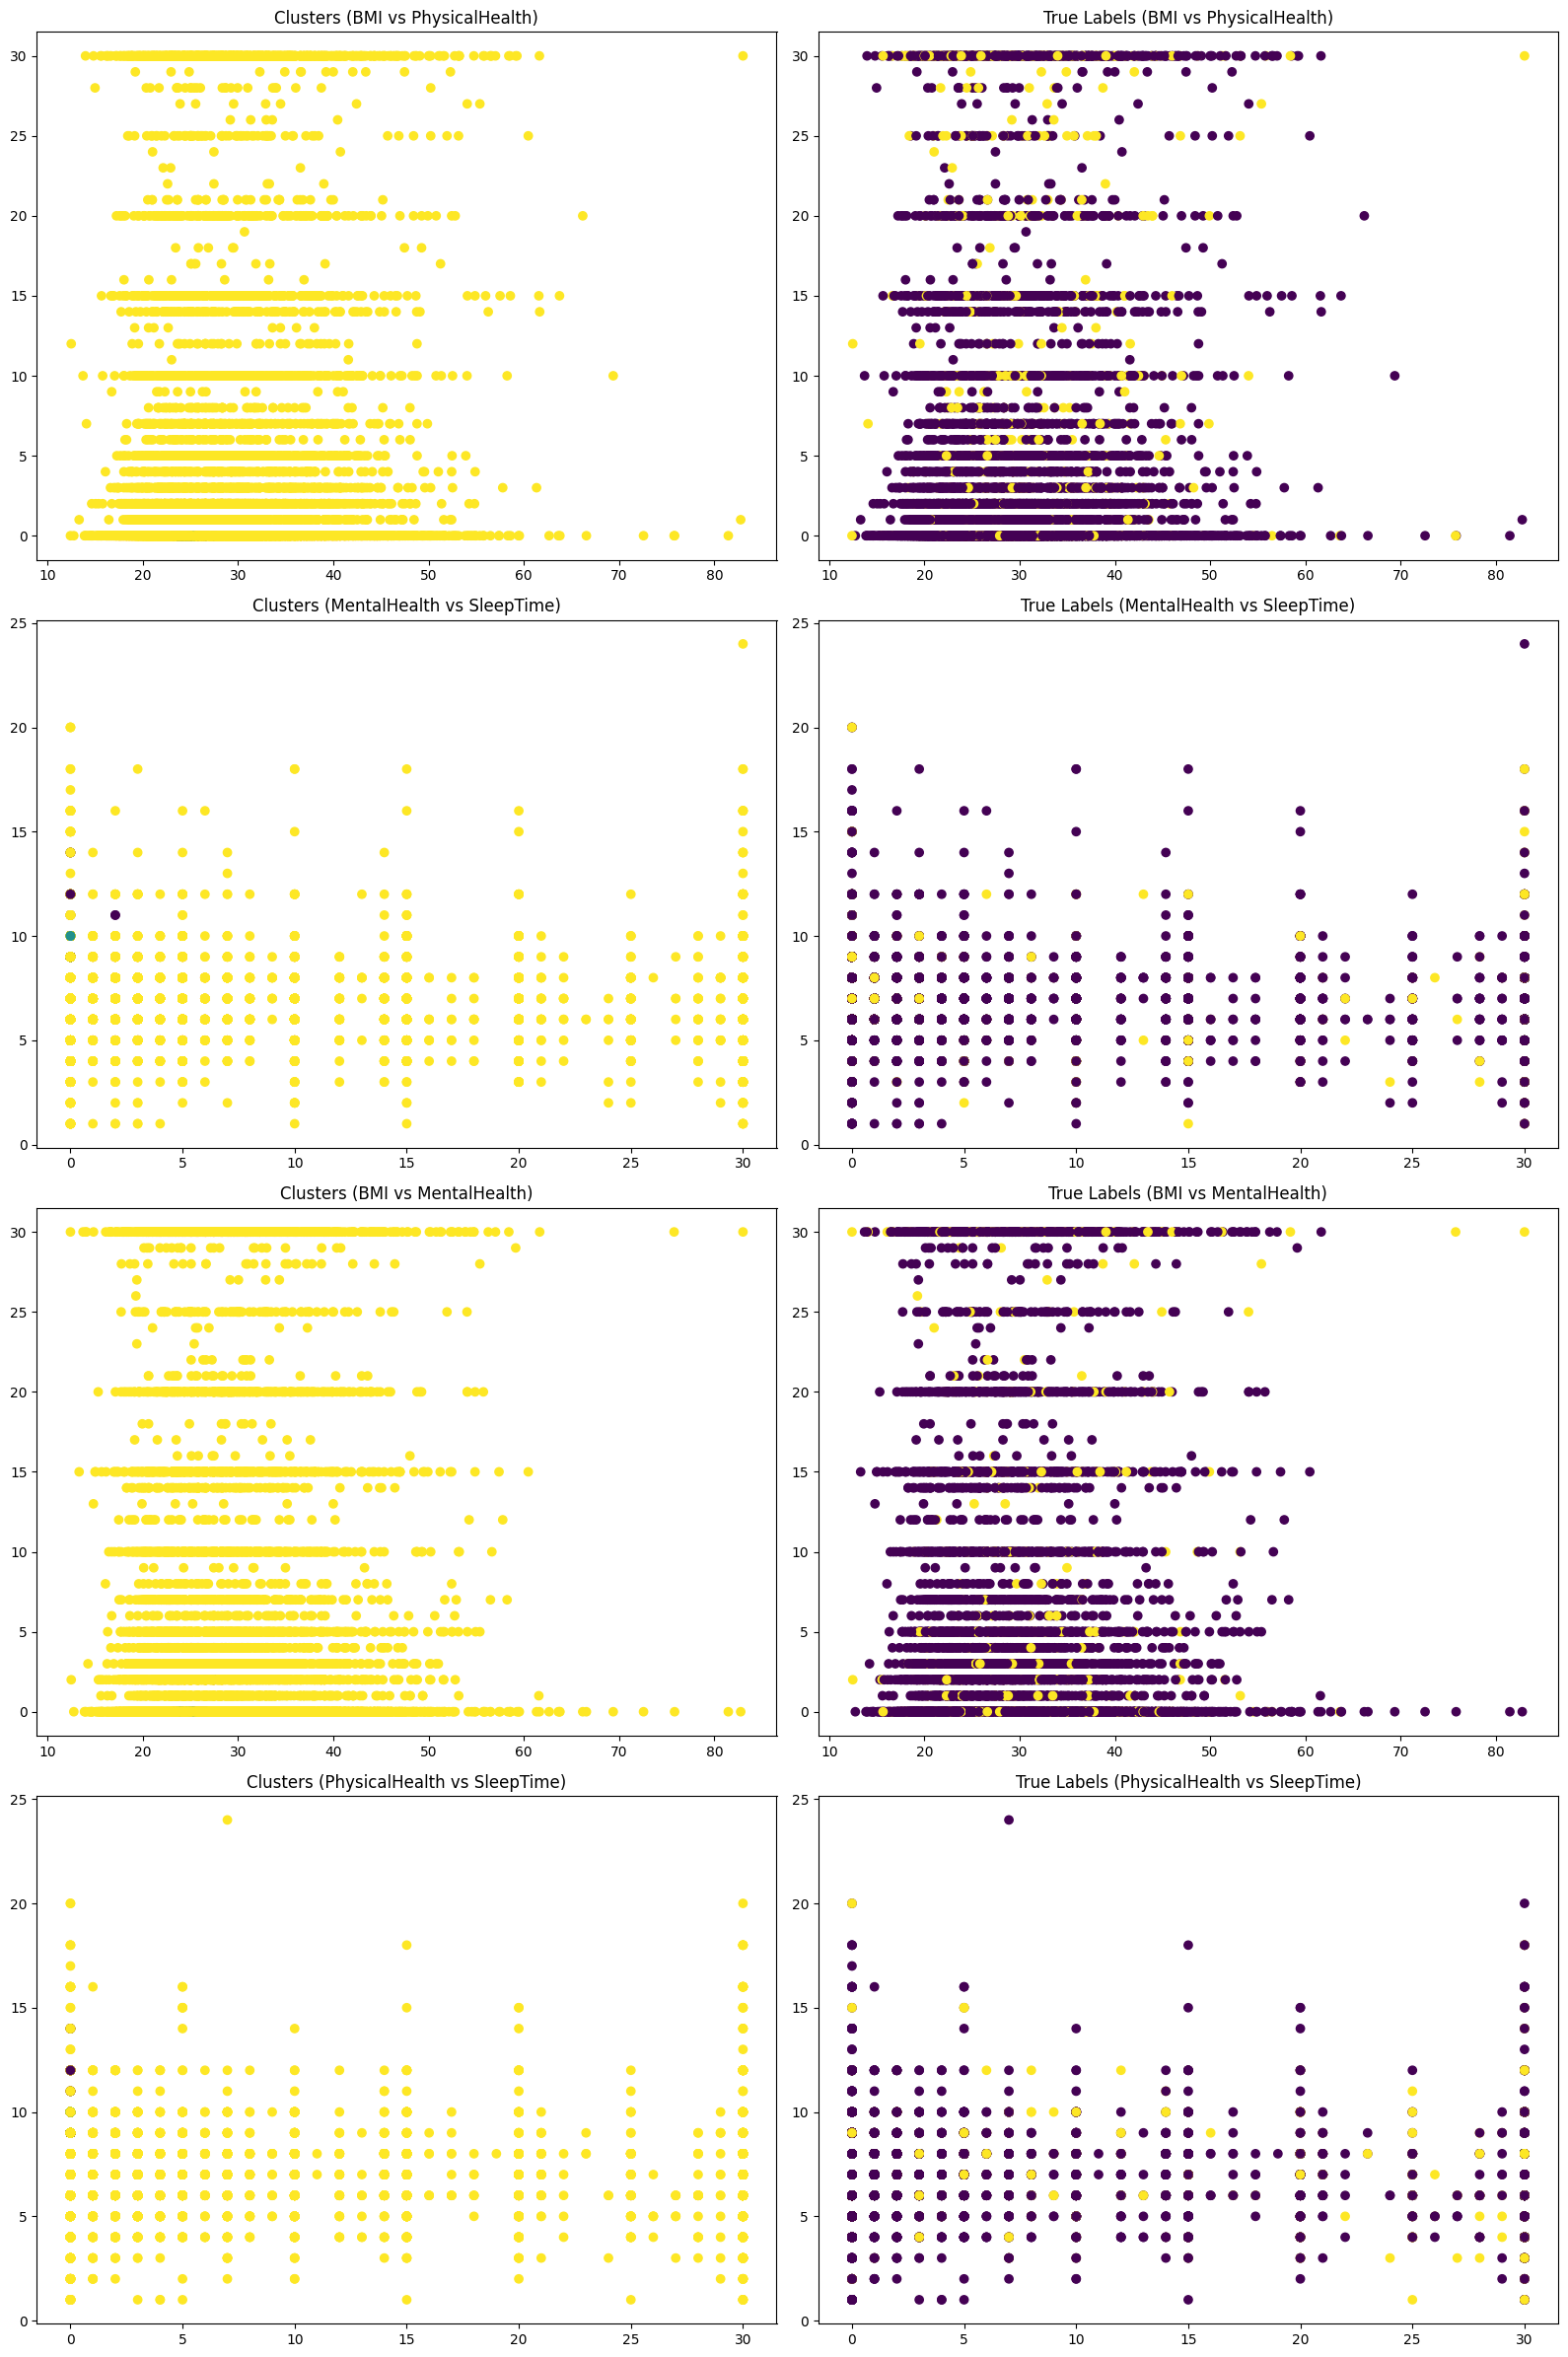

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//heart_2020_cleaned.csv").head(15000)

# Инициализация LabelEncoder
label_encoders = {}

# Кодирование категориальных переменных
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Выбор признаков для кластеризации
X = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

# Создание матрицы связей
linkage_matrix = linkage(X, method='ward')

# Применение иерархической кластеризации
result = hierarchy.fcluster(linkage_matrix, 10, criterion="distance")

# Преобразование меток кластеров
result = [0 if val == 1 else 1 if val == 3 else 2 for val in result]

# Визуализация результатов кластеризации и истинных меток
plt.figure(figsize=(16, 24))

# Визуализация кластеров на основе признаков 0 и 1
plt.subplot(4, 2, 1)
plt.scatter(X['BMI'], X['PhysicalHealth'], c=result, cmap='viridis')
plt.title('Clusters (BMI vs PhysicalHealth)')

# Визуализация истинных меток на основе признаков 0 и 1
plt.subplot(4, 2, 2)
plt.scatter(X['BMI'], X['PhysicalHealth'], c=df['HeartDisease'], cmap='viridis')
plt.title('True Labels (BMI vs PhysicalHealth)')

# Визуализация кластеров на основе признаков 2 и 3
plt.subplot(4, 2, 3)
plt.scatter(X['MentalHealth'], X['SleepTime'], c=result, cmap='viridis')
plt.title('Clusters (MentalHealth vs SleepTime)')

# Визуализация истинных меток на основе признаков 2 и 3
plt.subplot(4, 2, 4)
plt.scatter(X['MentalHealth'], X['SleepTime'], c=df['HeartDisease'], cmap='viridis')
plt.title('True Labels (MentalHealth vs SleepTime)')

# Визуализация кластеров на основе признаков 0 и 2
plt.subplot(4, 2, 5)
plt.scatter(X['BMI'], X['MentalHealth'], c=result, cmap='viridis')
plt.title('Clusters (BMI vs MentalHealth)')

# Визуализация истинных меток на основе признаков 0 и 2
plt.subplot(4, 2, 6)
plt.scatter(X['BMI'], X['MentalHealth'], c=df['HeartDisease'], cmap='viridis')
plt.title('True Labels (BMI vs MentalHealth)')

# Визуализация кластеров на основе признаков 1 и 3
plt.subplot(4, 2, 7)
plt.scatter(X['PhysicalHealth'], X['SleepTime'], c=result, cmap='viridis')
plt.title('Clusters (PhysicalHealth vs SleepTime)')

# Визуализация истинных меток на основе признаков 1 и 3
plt.subplot(4, 2, 8)
plt.scatter(X['PhysicalHealth'], X['SleepTime'], c=df['HeartDisease'], cmap='viridis')
plt.title('True Labels (PhysicalHealth vs SleepTime)')

plt.tight_layout()
plt.show()